# Importing Libraries 

In [175]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
iphone_reviews=[]

### Extracting reviews from snapdeal website ##############

In [176]:
########### Extracting reviews from snapdeal website ##############

iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [177]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [178]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [179]:
iphone_snapdeal

['I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted',
 'Lacks the feel.',
 'Genuine product quality great.. Overall perfect',
 'Good , product is satisfied which I got from Snapdeal',
 'got delivered on time and satisfactory product as always',
 'This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also',
 'Beautiful Product. Original Apple Product and delivery in 2nd day.\nAnd iPhone is iPhone ;-)',
 'Very good phone in this price category with manufacturers warranty',
 'This is the first iPhone that I bought. After using android for 3 years, I was not satisfied with the performance. So, thought of going for iPhone. Though, I didnt want to go for iPhone 6S as it was very costly for me. So, decided that I will buy iPhone 5C.\n\nSnapdeal has provided me a very great deal as compared to other sit

# Import Libraries

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

# load the dataset

In [181]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted','Lacks the feel.','Genuine product quality great.. Overall perfect','Good,product is satisfied which I got from Snapdeal','got delivered on time and satisfactory product as always','This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also','Beautiful Product. Original Apple Product and delivery in 2nd day.\nAnd iPhone is iPhone ;-)','Very good phone in this price category with manufacturers warranty','This is the first iPhone that I bought. After using android for 3 years,...,'it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""",'very good product...thanks to snapdeal and sellers to delivered the original phone :0)','The 5C was delivered in a sealed box - crisp and brand new ! super deal.','THE PROMPTNESS IN DELIVERY AND THE PRODUCT RECEIVED IS \n\nGOOD AND I AM SATISFIED','Worth in this price. Excellent features. Overall performance is Good','dream come true','Good phone','IPhone 5c good product on good price. Within one day I got the product though in site specied 3 working days.']


# Text processing

In [182]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted\'  \'Lacks the feel.\'  \'Genuine product quality great.. Overall perfect\'  \'Good   product is satisfied which I got from Snapdeal\'  \'got delivered on time and satisfactory product as always\'  \'This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also\'  \'Beautiful Product. Original Apple Product and delivery in 2nd day.\\nAnd iPhone is iPhone ;-)\'  \'Very good phone in this price category with manufacturers warranty\'  \'This is the first iPhone that I bought. After using android for 3 years  I was not satisfied with the performance. So  thought of going for iPhone. Though  I didnt want to go for iPhone 6S as it was very costly for me. So  decided that I will buy iPhone 5C.\\n\\nSnapdeal has provided me a very great deal as compared

In [183]:
# Remove Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  Lacks the feel  Genuine product quality great Overall perfect  Good   product is satisfied which I got from Snapdeal  got delivered on time and satisfactory product as always  This product is awwsum in use As by looks also I would defination prefer this nxt time also  Beautiful Product Original Apple Product and delivery in 2nd daynAnd iPhone is iPhone   Very good phone in this price category with manufacturers warranty  This is the first iPhone that I bought After using android for 3 years  I was not satisfied with the performance So  thought of going for iPhone Though  I didnt want to go for iPhone 6S as it was very costly for me So  decided that I will buy iPhone 5CnnSnapdeal has provided me a very great deal as compared to other sites Also  the delivery was very prompt as wellnnPro

In [184]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  Lacks the feel  Genuine product quality great Overall perfect  Good   product is satisfied which I got from Snapdeal  got delivered on time and satisfactory product as always  This product is awwsum in use As by looks also I would defination prefer this nxt time also  Beautiful Product Original Apple Product and delivery in 2nd daynAnd iPhone is iPhone   Very good phone in this price category with manufacturers warranty  This is the first iPhone that I bought After using android for 3 years  I was not satisfied with the performance So  thought of going for iPhone Though  I didnt want to go for iPhone 6S as it was very costly for me So  decided that I will buy iPhone 5CnnSnapdeal has provided me a very great deal as compared to other sites Also  the delivery was very prompt as wellnnPro

In [185]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to E:\Annoconda\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [186]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', 'am', 'very', 'very', 'happy', 'with', 'this', 'iPhone', 'when', 'I', 'was', 'ordering', 'this', 'phone', 'I', 'had', 'little', 'doubt', 'about', 'that', 'But', 'after', 'receiving', 'this', 'phone', 'I', 'am', 'really', 'very', 'happyalso', 'found', 'original', 'I', 'iPhoneearlier', 'I', 'had', 'doubted', 'Lacks', 'the', 'feel', 'Genuine', 'product', 'quality', 'great', 'Overall', 'perfect', 'Good', 'product', 'is', 'satisfied', 'which', 'I', 'got', 'from', 'Snapdeal', 'got', 'delivered', 'on', 'time', 'and', 'satisfactory', 'product', 'as', 'always', 'This', 'product', 'is', 'awwsum', 'in', 'use', 'As', 'by', 'looks', 'also', 'I', 'would', 'defination', 'prefer', 'this', 'nxt', 'time', 'also', 'Beautiful', 'Product', 'Original', 'Apple', 'Product', 'and', 'delivery', 'in', '2nd', 'daynAnd', 'iPhone', 'is', 'iPhone', 'Very', 'good', 'phone', 'in', 'this', 'price', 'category', 'with', 'manufacturers', 'warranty', 'This', 'is', 'the', 'first', 'iPhone', 'that', 'I', 'bought', 'Aft

In [187]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to E:\Annoconda\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to E:\Annoconda\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [188]:
# Tokens count
len(text_tokens)

1573

In [189]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['happy', 'iPhone', 'ordering', 'phone', 'little', 'doubt', 'But', 'receiving', 'phone', 'really', 'happyalso', 'found', 'original', 'iPhoneearlier', 'doubted', 'Lacks', 'feel', 'Genuine', 'product', 'quality', 'great', 'Overall', 'perfect', 'Good', 'product', 'satisfied', 'got', 'Snapdeal', 'got', 'delivered', 'time', 'satisfactory', 'product', 'always', 'This', 'product', 'awwsum', 'use', 'As', 'looks', 'also', 'would', 'defination', 'prefer', 'nxt', 'time', 'also', 'Beautiful', 'Product', 'Original', 'Apple', 'Product', 'delivery', '2nd', 'daynAnd', 'iPhone', 'iPhone', 'Very', 'good', 'phone', 'price', 'category', 'manufacturers', 'warranty', 'This', 'first', 'iPhone', 'bought', 'After', 'using', 'android', '3', 'years', 'satisfied', 'performance', 'So', 'thought', 'going', 'iPhone', 'Though', 'didnt', 'want', 'go', 'iPhone', '6S', 'costly', 'So', 'decided', 'buy', 'iPhone', '5CnnSnapdeal', 'provided', 'great', 'deal', 'compared', 'sites', 'Also', 'delivery', 'prompt', 'wellnnPros',

In [190]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['sleek', 'phone', 'looks', 'sexy', 'lags', 'really', 'great', 'headphone', 'got', 'upgrade', 'ios', '9nncons', 'plastic', 'body', 'got', 'great', 'discount', 'phone', 'worth', 'wife', 'wanted', 'try', 'iphone', 'loving', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommended', 'a', 'mush', 'deal', 'have', 'switched', 'android', 'apple', 'pretty', 'satisfied', 'iphone', '5c', 'excellent', 'camera', 'crisp', 'display', 'the', 'battery', 'issue', 'solved', 'latest', 'ios9', 'update', 'price', 'delivery', 'service', 'good', 'received', 'order', 'time', 'good', 'like', 'iphone', 'apple', 'snapdeal', 'service', 'good', 'awsme', 'delivry', 'time', 'product', 'recievd', 'good', 'condition', 'think', 'awsme', 'site', 'shoping', 'they', 'sold', 'iphone', 'interest', 'free', 'emi', 'scheme', 'even', 'though', 'phone', 'available', 'sellers', 'cheaper', 'price', 'but', 'interest', 'part', 'credited', 'account', 'till']


In [191]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['sleek', 'phone', 'look', 'sexi', 'lag', 'realli', 'great', 'headphon', 'got', 'upgrad', 'io', '9nncon', 'plastic', 'bodi', 'got', 'great', 'discount', 'phone', 'worth', 'wife', 'want', 'tri', 'iphon', 'love', 'good', 'price', 'great', 'seller', 'genuin', 'product', 'fast', 'ship', 'recommend', 'a', 'mush', 'deal', 'have', 'switch', 'android', 'appl', 'pretti', 'satisfi', 'iphon', '5c', 'excel', 'camera', 'crisp', 'display', 'the', 'batteri', 'issu', 'solv', 'latest', 'ios9', 'updat', 'price', 'deliveri', 'servic', 'good', 'receiv', 'order', 'time', 'good', 'like', 'iphon', 'appl', 'snapdeal', 'servic', 'good', 'awsm', 'delivri', 'time', 'product', 'recievd', 'good', 'condit', 'think', 'awsm', 'site', 'shope', 'they', 'sold', 'iphon', 'interest', 'free', 'emi', 'scheme', 'even', 'though', 'phone', 'avail', 'seller', 'cheaper', 'price', 'but', 'interest', 'part', 'credit', 'account', 'till']


In [192]:
!pip3 install en_core_web_sm
!python -m spacy download %


[x] No compatible package found for '%' (spaCy v3.1.2)



In [193]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

happy iphone ordering phone little doubt but receiving phone really happyalso found original iphoneearlier doubted lacks feel genuine product quality great overall perfect good product satisfied got snapdeal got delivered time satisfactory product always this product awwsum use as looks also would defination prefer nxt time also beautiful product original apple product delivery 2nd daynand iphone iphone very good phone price category manufacturers warranty this first iphone bought after using android 3 years satisfied performance so thought going iphone though didnt want go iphone 6s costly so decided buy iphone 5cnnsnapdeal provided great deal compared sites also delivery prompt wellnnpros sleek phone looks sexy lags really great headphone got upgrade ios 9nncons plastic body got great discount phone worth wife wanted try iphone loving good price great seller genuine product fast shipping recommended a mush deal have switched android apple pretty satisfied iphone 5c excellent camera c

In [194]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['happy', 'iphone', 'order', 'phone', 'little', 'doubt', 'but', 'receive', 'phone', 'really', 'happyalso', 'find', 'original', 'iphoneearlier', 'doubted', 'lack', 'feel', 'genuine', 'product', 'quality', 'great', 'overall', 'perfect', 'good', 'product', 'satisfied', 'get', 'snapdeal', 'got', 'deliver', 'time', 'satisfactory', 'product', 'always', 'this', 'product', 'awwsum', 'use', 'as', 'look', 'also', 'would', 'defination', 'prefer', 'nxt', 'time', 'also', 'beautiful', 'product', 'original', 'apple', 'product', 'delivery', '2nd', 'daynand', 'iphone', 'iphone', 'very', 'good', 'phone', 'price', 'category', 'manufacturer', 'warranty', 'this', 'first', 'iphone', 'buy', 'after', 'use', 'android', '3', 'year', 'satisfied', 'performance', 'so', 'think', 'go', 'iphone', 'though', 'do', 'nt', 'want', 'go', 'iphone', '6s', 'costly', 'so', 'decide', 'buy', 'iphone', '5cnnsnapdeal', 'provide', 'great', 'deal', 'compare', 'site', 'also', 'delivery', 'prompt', 'wellnnpro', 'sleek', 'phone', 'look

In [195]:
clean_comments=' '.join(lemmas)
clean_comments

'happy iphone order phone little doubt but receive phone really happyalso find original iphoneearlier doubted lack feel genuine product quality great overall perfect good product satisfied get snapdeal got deliver time satisfactory product always this product awwsum use as look also would defination prefer nxt time also beautiful product original apple product delivery 2nd daynand iphone iphone very good phone price category manufacturer warranty this first iphone buy after use android 3 year satisfied performance so think go iphone though do nt want go iphone 6s costly so decide buy iphone 5cnnsnapdeal provide great deal compare site also delivery prompt wellnnpro sleek phone look sexy lag really great headphone get upgrade io 9nncon plastic body get great discount phone worth wife want try iphone love good price great seller genuine product fast shipping recommend a mush deal have switch android apple pretty satisfied iphone 5c excellent camera crisp display the battery issue solve l

# Feature Extaction

### 1. Using CountVectorizer

In [196]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [197]:
print(cv.vocabulary_)

{'happy': 153, 'iphone': 173, 'order': 232, 'phone': 245, 'little': 191, 'doubt': 105, 'but': 53, 'receive': 288, 'really': 287, 'happyalso': 154, 'find': 130, 'original': 233, 'iphoneearlier': 175, 'doubted': 106, 'lack': 182, 'feel': 127, 'genuine': 140, 'product': 264, 'quality': 278, 'great': 149, 'overall': 235, 'perfect': 241, 'good': 144, 'satisfied': 302, 'get': 141, 'snapdeal': 334, 'got': 147, 'deliver': 96, 'time': 369, 'satisfactory': 301, 'always': 22, 'this': 364, 'awwsum': 36, 'use': 387, 'as': 30, 'look': 192, 'also': 21, 'would': 408, 'defination': 95, 'prefer': 252, 'nxt': 225, 'beautiful': 41, 'apple': 28, 'delivery': 97, '2nd': 6, 'daynand': 91, 'very': 392, 'price': 256, 'category': 60, 'manufacturer': 197, 'warranty': 394, 'first': 132, 'buy': 54, 'after': 18, 'android': 26, 'year': 410, 'performance': 244, 'so': 337, 'think': 363, 'go': 143, 'though': 366, 'do': 104, 'nt': 224, 'want': 393, '6s': 9, 'costly': 79, 'decide': 94, '5cnnsnapdeal': 8, 'provide': 274, '

In [198]:
print(cv.get_feature_names()[100:200])

['dis', 'discount', 'dispatchnprosn1', 'display', 'do', 'doubt', 'doubted', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'gift', 'go', 'good', 'goodbut', 'goood', 'got', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heat', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'in', 'initially', 'inter', 'interaction', 'interest', 'io', 'ios9', 'iphone', 'iphone5c', 'iphoneearlier', 'issue', 'it', 'item', 'itnniphone', 'its', 'job', 'lack', 'lag', 'lagging', 'late', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely', 'low', 'make', 'manufacturer', 'mark', 'marvallous']


In [199]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [200]:
print(clean_commentscv.toarray().shape)

(1028, 412)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [201]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [202]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'amazing', 'and', 'apple', 'awesome', 'battery', 'body', 'box', 'brand', 'bt', 'budget', 'but', 'buy', 'camera', 'cheap', 'condition', 'cool', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'excellent', 'experience', 'fast', 'file', 'gb', 'genuine', 'get', 'go', 'good', 'got', 'great', 'hang', 'happy', 'interest', 'io', 'iphone', 'issue', 'it', 'its', 'late', 'like', 'look', 'low', 'memory', 'mobile', 'need', 'new', 'nice', 'nt', 'one', 'order', 'original', 'pack', 'perfect', 'phone', 'plastic', 'price', 'problem', 'product', 'quality', 'really', 'receive', 'recommend', 'satisfactory', 'satisfied', 'satisfy', 'say', 'scheme', 'seller', 'service', 'shipping', 'site', 'snap', 'snapdeal', 'so', 'space', 'superb', 'take', 'thank', 'the', 'this', 'though', 'till', 'time', 'true', 'update', 'use', 'very', 'want', 'well', 'within', 'work', 'worth', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0

### 3. TF-IDF Vectorizer

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [204]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '1000r', '2030', '20k', '24', '2nd', '5c', '5cnnsnapdeal', '6s', '9nncon', 'absolutly', 'accessory', 'account', 'action', 'ad', 'adorable', 'affordable', 'after', 'almost', 'already', 'also', 'always', 'amazing', 'and', 'andriodblackberrywindow', 'android', 'app', 'apple', 'around', 'as', 'attractive', 'available', 'awesome', 'awesum', 'awsme', 'awwsum', 'back', 'battery', 'be', 'beatifully', 'beautiful', 'believe', 'bit', 'bluetooth', 'body', 'bodyn2', 'box', 'brand', 'bt', 'budget', 'build', 'business', 'but', 'buy', 'ca', 'camera', 'can', 'capacity', 'care', 'category', 'cell', 'charge', 'cheap', 'choice', 'choose', 'class', 'close', 'colour', 'come', 'commit', 'compare', 'competitive', 'con', 'condition', 'conditionnno', 'consist', 'contact', 'cool', 'costly', 'coupon', 'courier', 'cr', 'crazy', 'credit', 'crisp', 'customer', 'damage', 'dat', 'datum', 'day', 'daynand', 'deal', 'dear', 'decide', 'defination', 'deliver', 'delivery', 'delivry', 'dere', 'dis', 'discount',

# Generate Word Cloud

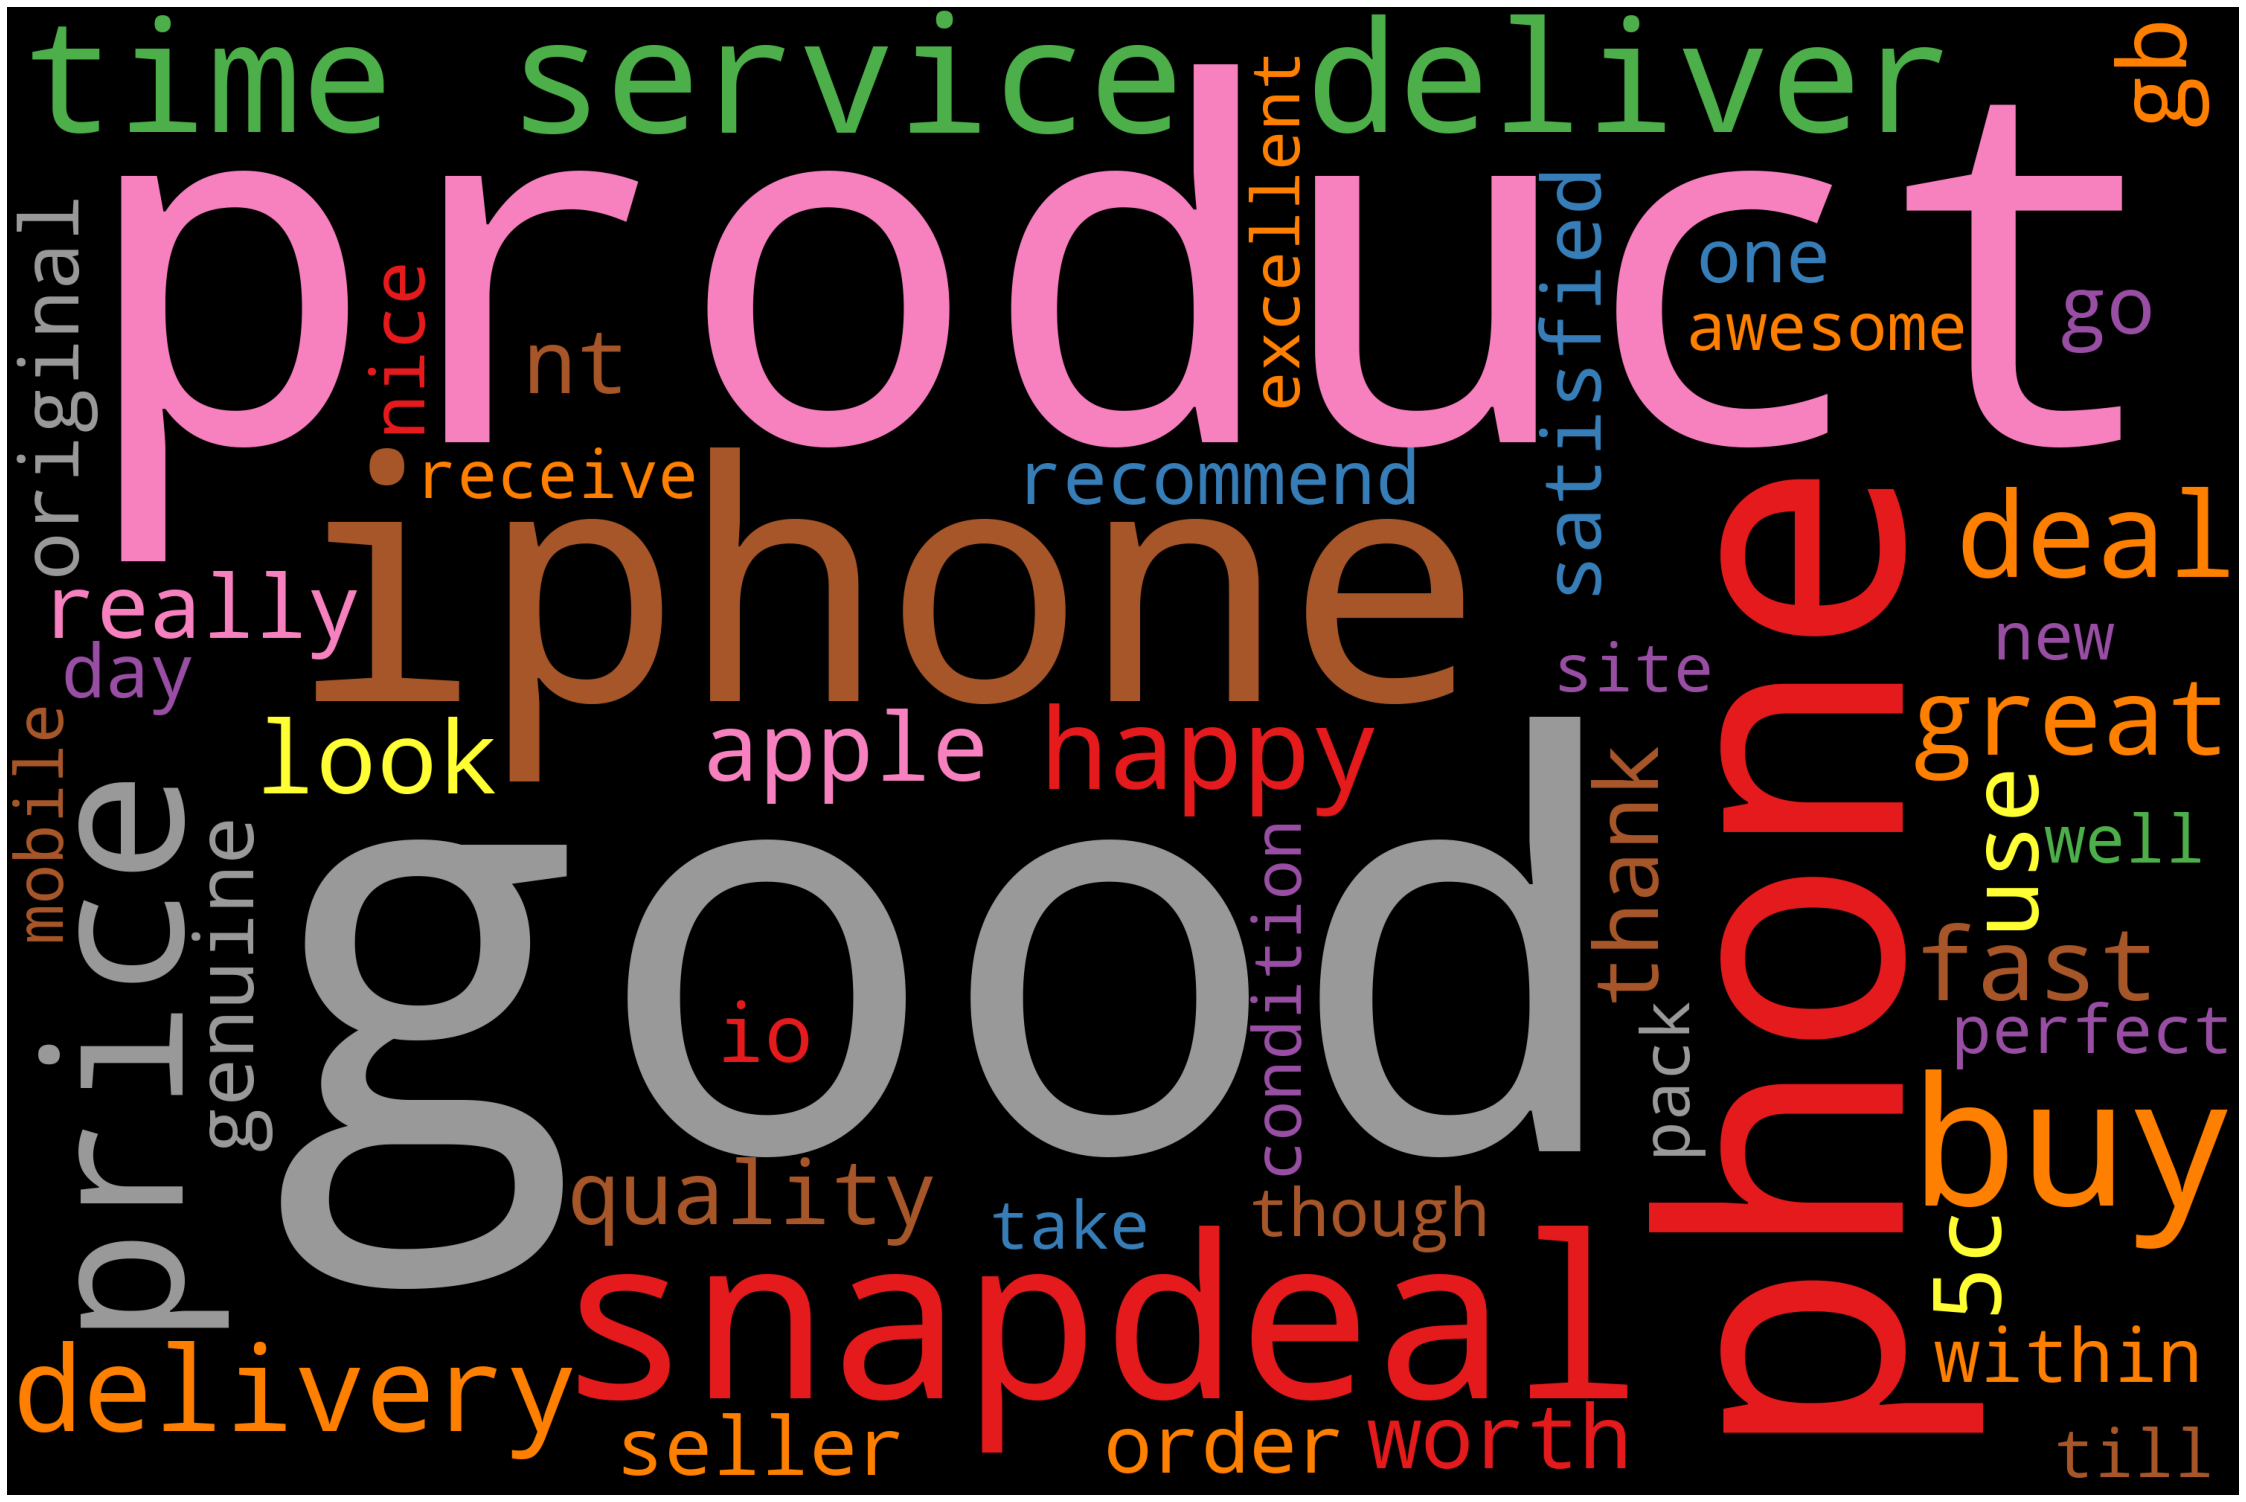

In [205]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [206]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [207]:
for token in doc_block[100:200]:
    print(token,token.pos_)

wellnnpro ADJ
sleek ADJ
phone NOUN
look VERB
sexy ADJ
lag NOUN
really ADV
great ADJ
headphone NOUN
get VERB
upgrade NOUN
io ADP
9nncon NUM
plastic NOUN
body NOUN
get VERB
great ADJ
discount NOUN
phone NOUN
worth ADJ
wife NOUN
want VERB
try VERB
iphone NOUN
love VERB
good ADJ
price NOUN
great ADJ
seller NOUN
genuine ADJ
product NOUN
fast ADJ
shipping NOUN
recommend VERB
a DET
mush NOUN
deal NOUN
have AUX
switch VERB
android NOUN
apple NOUN
pretty ADV
satisfied ADJ
iphone NOUN
5c NUM
excellent ADJ
camera NOUN
crisp ADJ
display NOUN
the DET
battery NOUN
issue NOUN
solve VERB
late ADJ
ios9 PROPN
update VERB
price NOUN
delivery NOUN
service NOUN
good ADJ
receive VERB
order NOUN
time NOUN
good ADJ
like ADP
iphone NOUN
apple NOUN
snapdeal ADJ
service NOUN
good ADJ
awsme NOUN
delivry NOUN
time NOUN
product NOUN
recievd PROPN
good ADJ
condition NOUN
think VERB
awsme NOUN
site NOUN
shop NOUN
they PRON
sell VERB
iphone NOUN
interest NOUN
free ADJ
emi NOUN
scheme NOUN
even ADV
though SCONJ
phone N

In [208]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['apple', 'service', 'awsme', 'delivry', 'time', 'product', 'condition', 'think', 'awsme', 'site', 'shop', 'sell', 'iphone', 'interest', 'emi', 'scheme', 'phone', 'seller', 'price', 'interest', 'part', 'credit', 'account', 'take', 'action', 'issue', 'buy', 'scheme', 'goood', 'shipping', 'productsnngood', 'job', 'snapdealkeep', 'product', 'service', 'snap', 'deal', 'experience', 'iphone', 'delivery', 'expectation', 'deal', 'shipping', 'service', 'product', 'pack', 'issue', 'courier', 'servicethey', 'take', 'day', 'deliver', 'get', 'phone', 'condition', 'thank', 'eliveryi', 'guess', 'ur', 'earn', 'trust', 'phoneever', 'usedyou', 'buy', 'month', 'buy', 'product', 'product', 'perform', 'purchase', 'phone', 'bit', 'purchasing', 'tell', 'iphone', 'get', 'price', 'pack', 'seller', 'day', 'prizen2', 'io', 'upgraden3', 'bodyn2', 'memorynnbut', 'body', 'look', 'plastuc', 'use', 'go', 'phone', 'budget', '20k', 'iphone', 'cell', 'phone', 'processing', 'memory', 'space', 'total']


In [209]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,39
1,iphone,28
2,phone,28
3,price,17
4,buy,15
5,service,12
6,deliver,11
7,time,11
8,delivery,11
9,deal,11


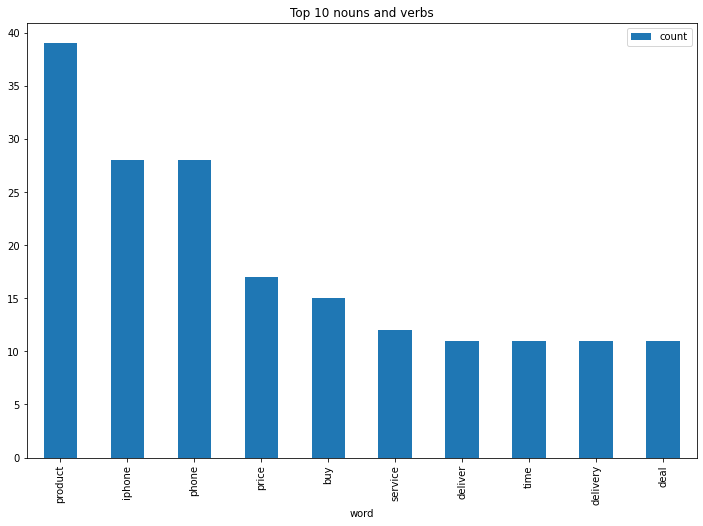

In [210]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [211]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

["['I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that.",
 "But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted'  'Lacks the feel.'",
 "'Genuine product quality great..",
 "Overall perfect'  'Good   product is satisfied which I got from Snapdeal'  'got delivered on time and satisfactory product as always'  'This product is awwsum in use... As by looks also..",
 "I would defination prefer this nxt time also'  'Beautiful Product.",
 "Original Apple Product and delivery in 2nd day.\\nAnd iPhone is iPhone ;-)'  'Very good phone in this price category with manufacturers warranty'  'This is the first iPhone that I bought.",
 'After using android for 3 years  I was not satisfied with the performance.',
 'So  thought of going for iPhone.',
 'Though  I didnt want to go for iPhone 6S as it was very costly for me.',
 'So  decided that I will buy iPhone 5C.\\n\\nSnapdeal has provided me a very gre

In [212]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,['I am very very happy with this iPhone .when ...
1,But after receiving this phone I am really ver...
2,'Genuine product quality great..
3,Overall perfect' 'Good product is satisfied...
4,I would defination prefer this nxt time also' ...
...,...
107,super deal.'
108,'THE PROMPTNESS IN DELIVERY AND THE PRODUCT RE...
109,Excellent features.
110,Overall performance is Good' 'dream come true...


In [213]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [214]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [215]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [216]:
# manual testing
calculate_sentiment(text='great')

3

In [217]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       2
1      -3
2       3
3       5
4       0
       ..
107     3
108     2
109     3
110    13
111     0
Name: sentiment_value, Length: 112, dtype: int64

In [218]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      20
1      20
2       4
3      30
4      10
       ..
107     2
108    18
109     2
110    16
111    14
Name: word_count, Length: 112, dtype: int64

In [219]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
68,But those all reviews are fake and just to dam...,-6,14
49,Dere is only one problem nd dat is space... Bt...,-4,20
22,Dont buy on fraudulent schemes.',-4,5
1,But after receiving this phone I am really ver...,-3,20
78,Only problem is you need to pay for everything.',-3,9
...,...,...,...
102,i would recommended Snapdeal service my near &...,15,60
64,'Pros : Picture quality is awesome sound with...,15,41
79,'Really happy with the product and service..al...,15,18
18,'Price and delivery service are good I receive...,16,51


In [220]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    112.000000
mean       3.080357
std        4.419731
min       -6.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       19.000000
Name: sentiment_value, dtype: float64

In [221]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,But after receiving this phone I am really ver...,-3,20
4,I would defination prefer this nxt time also' ...,0,10
7,So thought of going for iPhone.,0,6
8,Though I didnt want to go for iPhone 6S as it...,-1,16
12,Great Seller.,0,2
13,Genuine Product.,0,2
14,Fast Shipping.,0,2
19,Even though the phone was available from other...,0,13
20,But no interest part has been credited to my a...,0,12
21,Snapdeal hasnt taken any action on this issue.,0,8


In [222]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,['I am very very happy with this iPhone .when ...,2,20
2,'Genuine product quality great..,3,4
3,Overall perfect' 'Good product is satisfied...,5,30
5,Original Apple Product and delivery in 2nd day...,3,30
6,After using android for 3 years I was not sat...,2,13
...,...,...,...
106,'very good product...thanks to snapdeal and se...,5,27
107,super deal.',3,2
108,'THE PROMPTNESS IN DELIVERY AND THE PRODUCT RE...,2,18
109,Excellent features.,3,2


In [223]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,['I am very very happy with this iPhone .when ...,2,20,0
1,But after receiving this phone I am really ver...,-3,20,1
2,'Genuine product quality great..,3,4,2
3,Overall perfect' 'Good product is satisfied...,5,30,3
4,I would defination prefer this nxt time also' ...,0,10,4
...,...,...,...,...
107,super deal.',3,2,107
108,'THE PROMPTNESS IN DELIVERY AND THE PRODUCT RE...,2,18,108
109,Excellent features.,3,2,109
110,Overall performance is Good' 'dream come true...,13,16,110


E:\Annoconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

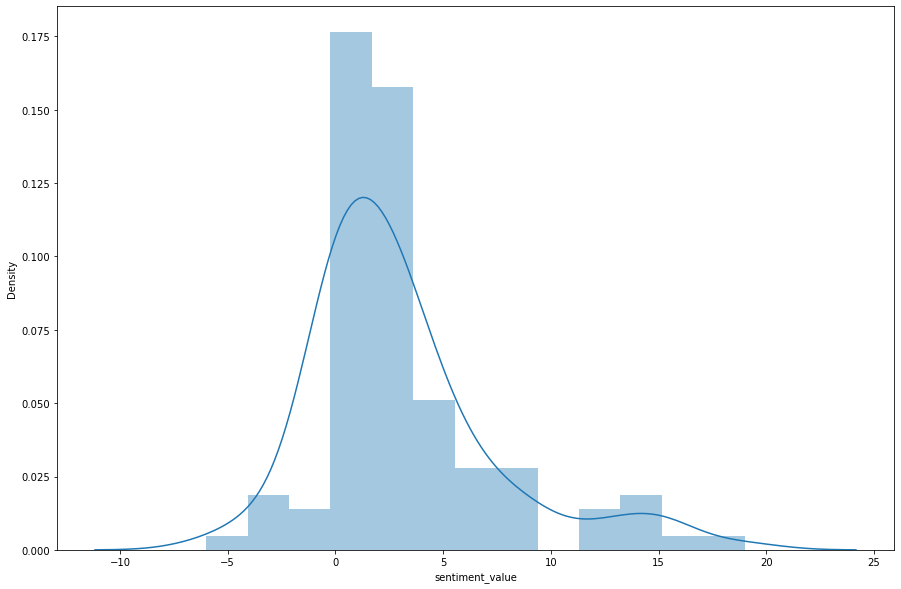

In [224]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

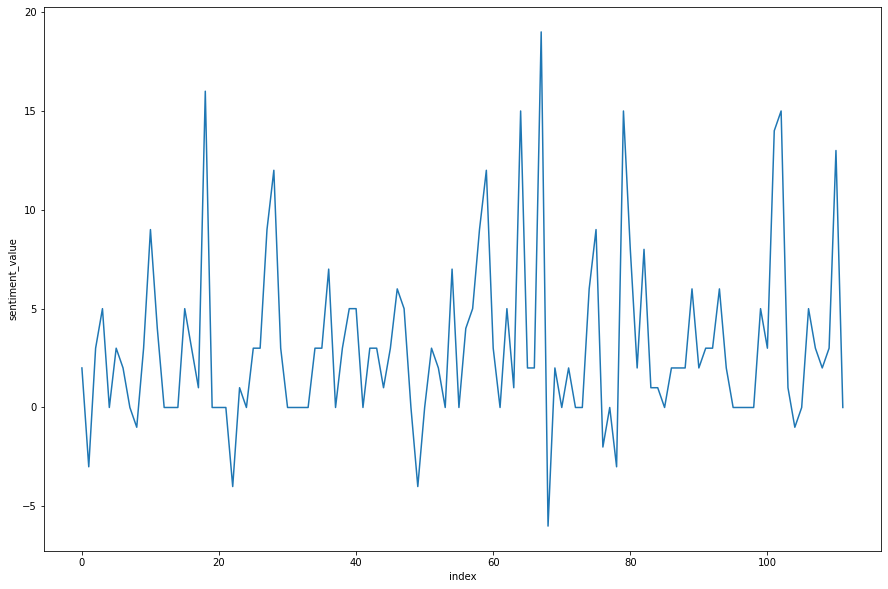

In [225]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

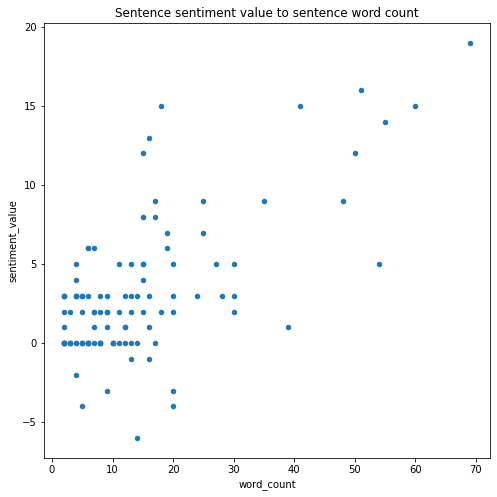

In [226]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')